## 支持向量机

观察二维数据集，观察不同C值对SVM的影响

In [236]:
from scipy.io import loadmat
import pandas as pd
import numpy as np

In [237]:
raw_data=loadmat('data/ex6data1.mat')
data=pd.DataFrame(raw_data['X'],columns=['X1','X2'])
data['y']=raw_data['y']
data[:3]

,X1,X2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1


将样本用散点图表示，o表示负样本，x表示正样本

In [238]:
positive=data[data['y'].isin([1])]#提取dataframe里面的所有正样本
positive

,X1,X2,y
0,1.964300,4.5957,1
1,2.275300,3.8589,1
2,2.978100,4.5651,1
3,2.932000,3.5519,1
4,3.577200,2.8560,1
5,4.015000,3.1937,1
6,3.381400,3.4291,1
7,3.911300,4.1761,1
8,2.782200,4.0431,1
9,2.551800,4.6162,1


In [239]:
negative=data[data['y'].isin([0])]#提取dataframe里面所有的负样本
negative

,X1,X2,y
20,1.58410,3.3575,0
21,2.01030,3.2039,0
22,1.95270,2.7843,0
23,2.27530,2.7127,0
24,2.30990,2.9584,0
25,2.82830,2.6309,0
26,3.04730,2.2931,0
27,2.48270,2.0373,0
28,2.50570,2.3853,0
29,1.87210,2.0577,0


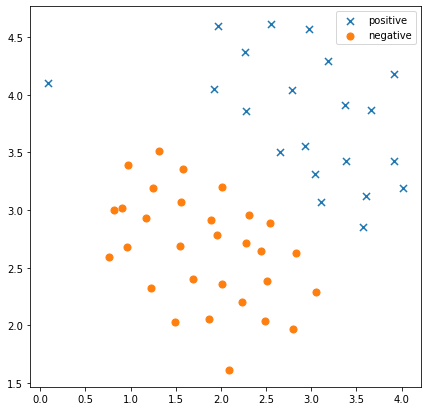

In [240]:
#画出样本的散点图
import matplotlib.pyplot as plt

fig,ax=plt.subplots(figsize=(7,7))
#参数s表示 size in points^2，控制散点的大小
ax.scatter(positive['X1'],positive['X2'],s=50,marker='x',label='positive')
ax.scatter(negative['X1'],negative['X2'],s=50,marker='o',label='negative')
ax.legend()
plt.show()

In [241]:
#使用sklearn内置的svm算法
from sklearn import svm
#C：错误项惩罚的参数，即公式里的C
#loss：hinge表示标准的SVM损失
#max_iter：最大迭代次数
svc=svm.LinearSVC(C=1,loss='hinge',max_iter=1000)#警告说未收敛，需要增大迭代次数，但是其实增加迭代次数后score的结果是一样的

hinge loss可以参考图中“\\_ _/”形状的线
<img style="float: left;" src="../img/hingeloss.png">

In [242]:
svc.fit(data[['X1','X2']],data['y'])#训练模型
svc.score(data[['X1','X2']],data['y'])#预测准确率

D:\Software\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.9803921568627451

In [243]:
#尝试增大C看看结果会怎么样
svc2=svm.LinearSVC(C=100,loss='hinge',max_iter=1000)
svc2.fit(data[['X1','X2']],data['y'])#训练模型
svc2.score(data[['X1','X2']],data['y'])#预测准确率

D:\Software\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.9803921568627451

svc和svc2如果迭代次数足够大，最终应该都会收敛至同一个决策边界，这里没有设置太大的迭代次数是为了观察不同C对svm的影响

In [244]:
data['svm1 confidence']=svc.decision_function(data[['X1','X2']])#大于0为一类，小于0为一类，返回样本的置信度
data

,X1,X2,y,svm1 confidence
0,1.964300,4.5957,1,0.800822
1,2.275300,3.8589,1,0.383012
2,2.978100,4.5651,1,1.375716
3,2.932000,3.5519,1,0.520832
4,3.577200,2.8560,1,0.334184
5,4.015000,3.1937,1,0.869081
6,3.381400,3.4291,1,0.686446
7,3.911300,4.1761,1,1.610168
8,2.782200,4.0431,1,0.833416
9,2.551800,4.6162,1,1.165205


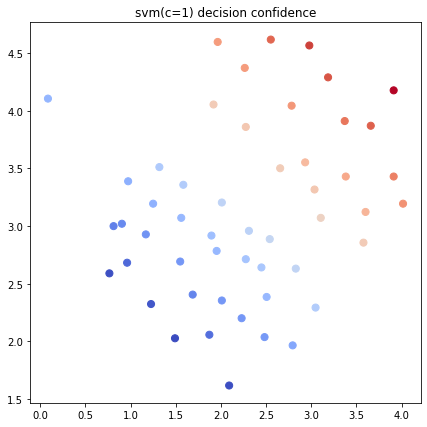

In [245]:
fig,ax=plt.subplots(figsize=(7,7))
ax.scatter(data['X1'],data['X2'],c=data['svm1 confidence'],s=50,cmap='coolwarm')

ax.set_title('svm(c=1) decision confidence')
plt.show()

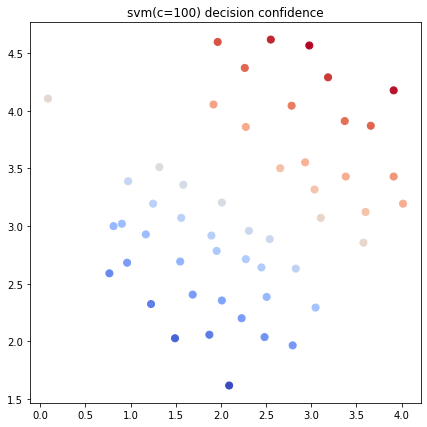

In [246]:
data['svm2 confidence']=svc2.decision_function(data[['X1','X2']])
fig,ax=plt.subplots(figsize=(7,7))
ax.scatter(data['X1'],data['X2'],c=data['svm2 confidence'],s=50,cmap='coolwarm')
ax.set_title('svm(c=100) decision confidence')
plt.show()#注意边界点和异常点的颜色

到这里我们完成了线性svm的部分，接下来尝试高斯核+svm

### 高斯核函数：  
<img style="float: left;" src="../img/gaussian_kernel.png">

In [247]:
#只是加深理解，后面并没有用到
def gaussian_kernel(x1,x2,sigma):
    first_term=-np.sum((x1-x2)**2)
    second_term=2*sigma**2
    return np.exp(first_term/second_term)#python可以用**表示幂运算

In [248]:
#测试
x1 = np.array([1.0, 2.0, 1.0])
x2 = np.array([0.0, 4.0, -1.0])
sigma = 2

gaussian_kernel(x1, x2, sigma)#结果和参考代码结果相同

0.32465246735834974

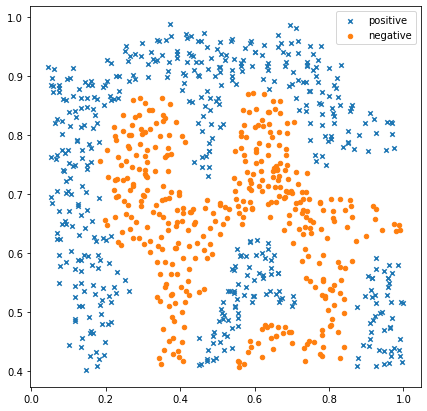

In [249]:
#读取新数据
raw_data=loadmat('data/ex6data2.mat')
data=pd.DataFrame(raw_data['X'],columns=['X1','X2'])
data['y']=raw_data['y']
positive=data[data['y'].isin([1])]#提取dataframe里面的所有正样本
negative=data[data['y'].isin([0])]#提取dataframe里面所有的负样本

#画图
fig,ax=plt.subplots(figsize=(7,7))
ax.scatter(positive['X1'],positive['X2'],s=20,marker='x',label='positive')
ax.scatter(negative['X1'],negative['X2'],s=20,marker='o',label='negative')
ax.legend()
plt.show()

In [250]:
#gamma：核函数系数，应该是sigma
#probability：决定最后是否按概率输出每种可能的概率，设置为True则后面可以调用predict_proba
svc=svm.SVC(C=100,gamma=10,probability=True)#默认核函数即为高斯核函数

In [251]:
svc.fit(data[['X1','X2']],data['y'])
svc.score(data[['X1','X2']],data['y'])

0.9698725376593279

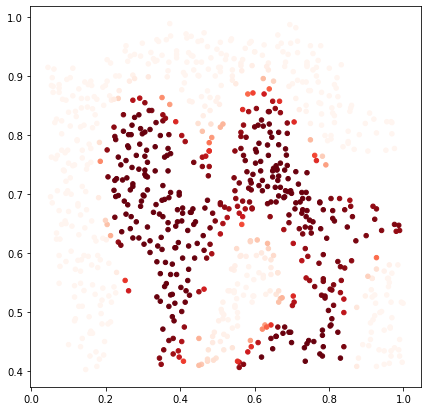

In [252]:
data['probability']=svc.predict_proba(data[['X1','X2']])[:,0]#这个索引存储的是负样本的预测概率
fig,ax=plt.subplots(figsize=(7,7))
ax.scatter(data['X1'],data['X2'],s=20,c=data['probability'],cmap='Reds')
plt.show()#所以图中显示的都是预测的负样本，概率越大颜色应该越深，颜色浅的对应就是预测的正样本

到这里完成了svm+高斯核的部分，接下来尝试为svm模型(高斯核)找到最优参数

In [253]:
data=loadmat('data/ex6data3.mat')
X=data['X']
y=data['y']
Xval=data['Xval']
yval=data['yval']

C_values=[0.01,0.03,0.1,0.3,1,3,10,30,100]
gamma_values=[0.01,0.03,0.1,0.3,1,3,10,30,100]

best_score=0
best_C=0
best_gamma=0

for C in C_values:
    for gamma in gamma_values:
        svc=svm.SVC(C=C,gamma=gamma)
        svc.fit(X,y.ravel())#这里如果我传y会警告需要将列向量转换为一维数组，因此我这里对y进行ravel
        score=svc.score(Xval,yval)
        if score>best_score:
            best_score=score
            best_C=C
            best_gamma=gamma

print('the best score is {}\nC={}, gamma={}'.format(best_score,best_C,best_gamma))

the best score is 0.965
C=0.3, gamma=100


到这里我们完成了最佳参数的挑选。接下来将尝试使用svm构建垃圾邮件分类器。

In [254]:
spam_train=loadmat('data/spamTrain.mat')
spam_test=loadmat('data/spamTest.mat')

X=spam_train['X']
y=spam_train['y']

X_test=spam_test['Xtest']
y_test=spam_test['ytest']

X.shape,y.shape,X_test.shape,y_test.shape

((4000, 1899), (4000, 1), (1000, 1899), (1000, 1))

以X.shape举例，4000表示样本数，1899表示词汇表中1899个单词，用二进制进行编码表示是否出现该单词。

In [255]:
svc=svm.SVC()
svc.fit(X,y.ravel())
svc.score(X,y)#在训练集上的表现

0.99325

In [256]:
svc.score(X_test,y_test)#在测试集上的表现

0.987